In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from py_wake.examples.data.hornsrev1 import Hornsrev1Site
from py_wake.examples.data.iea37 import IEA37Site
from py_wake.examples.data.ParqueFicticio import ParqueFicticioSite

sites = {"IEA37": IEA37Site(n_wt=16),
         "Hornsrev1": Hornsrev1Site(),
         "ParqueFicticio": ParqueFicticioSite()}

In [4]:
# import and setup site and windTurbines
from py_wake.examples.data.iea37 import IEA37Site, IEA37_WindTurbines
from py_wake.deficit_models.gaussian import BastankhahGaussianDeficit
from py_wake.wind_turbines import WindTurbine, WindTurbines
from py_wake.wind_farm_models import PropagateDownwind
from py_wake.superposition_models import LinearSum

site = IEA37Site(16)

# setup current, neighbour and all positions
wt_x, wt_y = site.initial_position.T
neighbour_x, neighbour_y = wt_x-4000, wt_y
all_x, all_y = np.r_[wt_x,neighbour_x], np.r_[wt_y,neighbour_y]

windTurbines = WindTurbines.from_WindTurbine_lst([IEA37_WindTurbines(),IEA37_WindTurbines()])
windTurbines._names = ["Current wind farm","Neighbour wind farm"]
types = [0]*len(wt_x) + [1]*len(neighbour_x)

wf_model = PropagateDownwind(site, windTurbines,
                             wake_deficitModel=BastankhahGaussianDeficit(use_effective_ws=True),
                             superpositionModel=LinearSum())

# Consider wd=270 +/- 30 deg only
wd_lst = np.arange(240,301)

Text(0.5, 1.0, 'Wake map for 267 deg and 9.8 m/s')

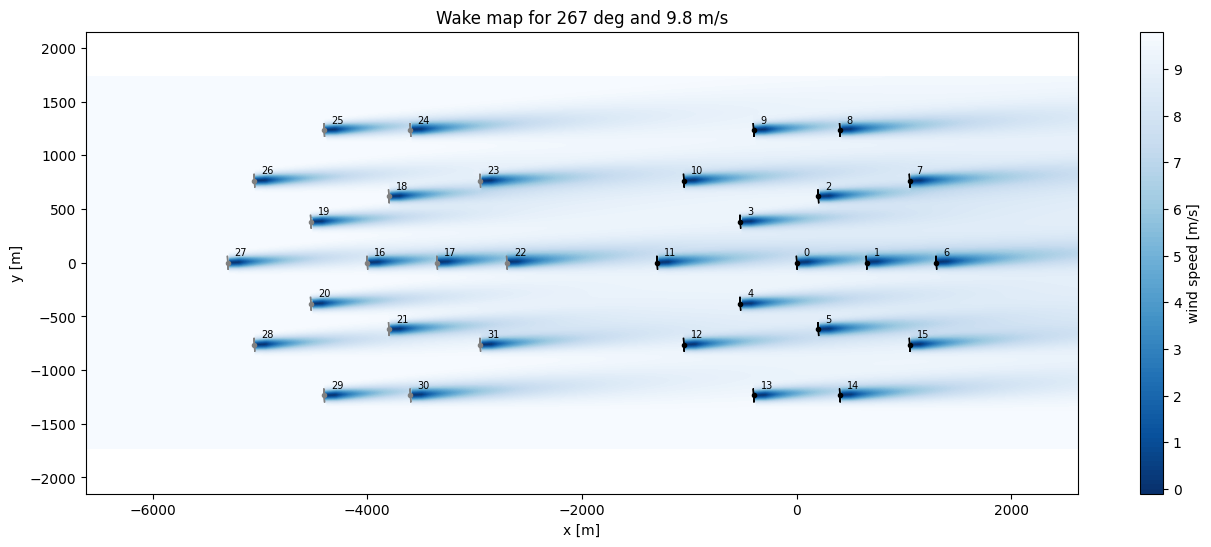

In [5]:
#plotting the wake maps for the desired flow case
wsp = 9.8
wdir = 267

plt.figure(figsize=(16, 6))
wf_model(all_x, all_y, type=types, wd=wdir, ws=wsp, h=110).flow_map().plot_wake_map()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Wake map for'+ f' {wdir} deg and {wsp} m/s')

In [7]:
localWinds = {name: site.local_wind(x=site.initial_position[:,0],          # x position
                                    y = site.initial_position[:,1],        # y position
                                    h=site.initial_position[:,0]*0+70,     # height
                              ws=None,                                       # defaults to 3,4,..,25
                              wd=None,                                       # defaults to 0,1,...,360
                              ) for name, site in sites.items()}

In [8]:
print (localWinds['IEA37'].coords.keys())
localWinds['IEA37'].P

dict_keys(['wd', 'ws', 'i', 'x', 'y', 'h'])


<xarray.DataArray (wd: 360)> Size: 3kB
array([0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
       0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
       0.00111111, 0.00111111, 0.00106667, 0.00106667, 0.00106667,
       0.00106667, 0.00106667, 0.00106667, 0.00106667, 0.00106667,
       0.00106667, 0.00106667, 0.00106667, 0.00106667, 0.00106667,
       0.00106667, 0.00106667, 0.00106667, 0.00106667, 0.00106667,
       0.00106667, 0.00106667, 0.00106667, 0.00106667, 0.00128889,
       0.00128889, 0.00128889, 0.00128889, 0.00128889, 0.00128889,
       0.00128889, 0.00128889, 0.00128889, 0.00128889, 0.00128889,
       0.00128889, 0.00128889, 0.00128889, 0.00128889, 0.00128889,
       0.00128889, 0.00128889, 0.00128889, 0.00128889, 0.00128889,
       0.00128889, 0.00128889, 0.0016    , 0.0016    , 0.0016    ,
       0.0016    , 0.0016    , 0.0016    , 0.0016    , 0.0016    ,
       0.0016    , 0.0016    , 0.0016    , 0.0016    , 0.0016    ,
       0.0016    , 0.0016    , 0.0016    , 0.0016    , 0.0016    ,
       0.0016    , 0.0016    , 0.0016    , 0.0016    , 0.0028    ,
       0.0028    , 0.0028    , 0.0028    , 0.0028    , 0.0028    ,
       0.0028    , 0.0028    , 0.0028    , 0.0028    , 0.0028    ,
       0.0028    , 0.0028    , 0.0028    , 0.0028    , 0.0028    ,
       0.0028    , 0.0028    , 0.0028    , 0.0028    , 0.0028    ,
...
       0.00946667, 0.00946667, 0.00946667, 0.00946667, 0.00946667,
       0.00946667, 0.00946667, 0.00946667, 0.00946667, 0.00946667,
       0.00946667, 0.00946667, 0.00946667, 0.00946667, 0.00946667,
       0.00946667, 0.00946667, 0.00946667, 0.00946667, 0.00946667,
       0.00946667, 0.00946667, 0.00204444, 0.00204444, 0.00204444,
       0.00204444, 0.00204444, 0.00204444, 0.00204444, 0.00204444,
       0.00204444, 0.00204444, 0.00204444, 0.00204444, 0.00204444,
       0.00204444, 0.00204444, 0.00204444, 0.00204444, 0.00204444,
       0.00204444, 0.00204444, 0.00204444, 0.00204444, 0.00142222,
       0.00142222, 0.00142222, 0.00142222, 0.00142222, 0.00142222,
       0.00142222, 0.00142222, 0.00142222, 0.00142222, 0.00142222,
       0.00142222, 0.00142222, 0.00142222, 0.00142222, 0.00142222,
       0.00142222, 0.00142222, 0.00142222, 0.00142222, 0.00142222,
       0.00142222, 0.00142222, 0.00097778, 0.00097778, 0.00097778,
       0.00097778, 0.00097778, 0.00097778, 0.00097778, 0.00097778,
       0.00097778, 0.00097778, 0.00097778, 0.00097778, 0.00097778,
       0.00097778, 0.00097778, 0.00097778, 0.00097778, 0.00097778,
       0.00097778, 0.00097778, 0.00097778, 0.00097778, 0.00111111,
       0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
       0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111])
Coordinates:
  * wd       (wd) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
Attributes:
    description:  Probability of wind flow case (i.e. wind direction and wind...

In [9]:
localWinds['Hornsrev1'].P

<xarray.DataArray (wd: 360, ws: 23)> Size: 66kB
array([[6.14682576e-05, 8.55902794e-05, 1.05949549e-04, ...,
        1.41427496e-07, 5.73800241e-08, 2.19294217e-08],
       [6.14682576e-05, 8.55902794e-05, 1.05949549e-04, ...,
        1.41427496e-07, 5.73800241e-08, 2.19294217e-08],
       [6.14682576e-05, 8.55902794e-05, 1.05949549e-04, ...,
        1.41427496e-07, 5.73800241e-08, 2.19294217e-08],
       ...,
       [6.14682576e-05, 8.55902794e-05, 1.05949549e-04, ...,
        1.41427496e-07, 5.73800241e-08, 2.19294217e-08],
       [6.14682576e-05, 8.55902794e-05, 1.05949549e-04, ...,
        1.41427496e-07, 5.73800241e-08, 2.19294217e-08],
       [6.14682576e-05, 8.55902794e-05, 1.05949549e-04, ...,
        1.41427496e-07, 5.73800241e-08, 2.19294217e-08]], shape=(360, 23))
Coordinates:
  * wd       (wd) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
Attributes:
    description:  Probability of wind flow case (i.e. wind direction and wind...

In [10]:
for name, lw in localWinds.items():
    print (name)
    print (lw.WS.values, 'm/s')
    print ("="*100)

IEA37
9.8 m/s
Hornsrev1
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] m/s
ParqueFicticio
[[[ 3.78471012  5.04628015  6.30785019 ... 29.01611089 30.27768093
   31.53925096]
  [ 3.80282588  5.07043451  6.33804314 ... 29.15499845 30.42260708
   31.69021571]
  [ 3.82094165  5.09458887  6.36823609 ... 29.29388601 30.56753323
   31.84118045]
  ...
  [ 3.73730114  4.98306819  6.22883524 ... 28.6526421  29.89840915
   31.1441762 ]
  [ 3.75310413  5.00413885  6.25517356 ... 28.77379836 30.02483307
   31.27586779]
  [ 3.76890713  5.0252095   6.28151188 ... 28.89495463 30.151257
   31.40755938]]

 [[ 3.95569235  5.27425647  6.59282059 ... 30.3269747  31.64553882
   32.96410294]
  [ 3.97160588  5.29547451  6.61934314 ... 30.44897845 31.77284708
   33.0967157 ]
  [ 3.98751942  5.31669256  6.64586569 ... 30.5709822  31.90015533
   33.22932847]
  ...
  [ 3.9194794   5.22597253  6.53246567 ... 30.04934207 31.35583521
   32.66232834]
  [ 3.93155038  5.24206718  6.55258397 ... 3

(np.float64(262878.0),
 np.float64(264778.0),
 np.float64(6504714.0),
 np.float64(6506614.0))

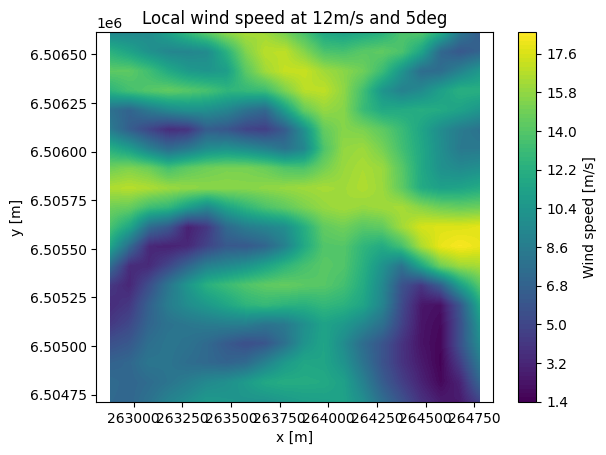

In [17]:
s = sites["ParqueFicticio"]
x = np.linspace(262878,264778,200)
y = np.linspace(6504714,6506614,200)
X,Y = np.meshgrid(x,y)
lw = s.local_wind(X.flatten(),Y.flatten(),30, ws=[12],wd=[5])
Z = lw.WS_ilk.reshape(X.shape)
c = plt.contourf(X,Y,Z, levels=100)
plt.colorbar(c,label='Wind speed [m/s]')
plt.title("Local wind speed at 12m/s and 5deg")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axis('equal')

In [18]:
wd = [0, 30,90] # wind direction at source

for name, site in sites.items():
    print ("------- %s -------"%name)
    wt_x, wt_y = site.initial_position[0]
    site.distance.setup(src_x_ilk=[wt_x, wt_x], src_y_ilk=[wt_y, wt_y-1000], src_h_ilk=[70,90], src_z_ilk=[0,0]) # wt2 1000m to the south
    dw_ijlk, cw_ijlk, dh_ijlk = site.distance(wd_l=wd, src_idx=[0], dst_idx=[[1,1,1]])


    print ('Wind direction: \t\t%d deg\t\t%d deg\t\t%d deg'%tuple(wd))
    print ('Down wind distance [m]: \t%.1f\t\t%.1f\t\t%.1f'%tuple(dw_ijlk[0,0,:,0]))
    print ('Cross wind distance [m]: \t%.1f\t\t%.1f\t\t%.1f'%tuple(cw_ijlk[0,0,:,0]))
    print ('Height difference [m]: \t\t%.1f\t\t%.1f\t\t%.1f'%tuple(dh_ijlk[0,0,:,0]))
    print()

------- IEA37 -------
Wind direction: 		0 deg		30 deg		90 deg
Down wind distance [m]: 	1000.0		866.0		0.0
Cross wind distance [m]: 	0.0		500.0		1000.0
Height difference [m]: 		20.0		20.0		20.0

------- Hornsrev1 -------
Wind direction: 		0 deg		30 deg		90 deg
Down wind distance [m]: 	1000.0		866.0		0.0
Cross wind distance [m]: 	0.0		500.0		1000.0
Height difference [m]: 		20.0		20.0		20.0

------- ParqueFicticio -------
Wind direction: 		0 deg		30 deg		90 deg
Down wind distance [m]: 	1023.6		886.5		-0.0
Cross wind distance [m]: 	0.0		500.0		1000.0
Height difference [m]: 		20.0		20.0		20.0



In [30]:
import matplotlib.pyplot as plt
site = sites['Hornsrev1']

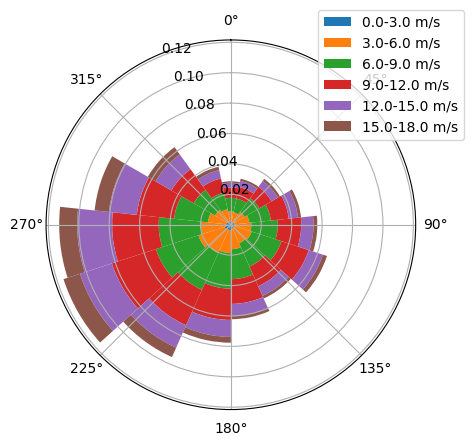

In [31]:
_ = site.plot_wd_distribution(n_wd=15, ws_bins=[0,3,6,9,12,15,18])

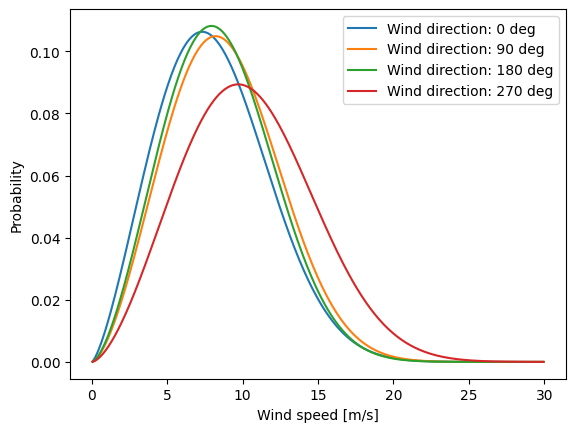

In [32]:
_ = site.plot_ws_distribution(wd=[0,90,180,270])